<a href="https://colab.research.google.com/github/physicsme1729/Numerical-methods-in-physics/blob/main/11_swarup_kumar_Giri_phy_P745.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem-1:***

Find the minimum of the function $F(x, y, z) = 2x^2 + 3y^2 + z^2 + xy + xz − 2y$

and confirm the result analytically.

# ***Solution:-***

**Analytical solution:**




To find the minimum of the function $F(x, y, z) = 2x^2 + 3y^2 + z^2 + xy + xz - 2y$, we can use calculus. The minimum occurs at a point where the gradient of the function is zero. The gradient of the function is a vector of its partial derivatives with respect to each variable:

$
\nabla F = \left(\frac{\partial F}{\partial x}, \frac{\partial F}{\partial y}, \frac{\partial F}{\partial z}\right)
$

Let's compute the partial derivatives of \(F\) with respect to \(x\), \(y\), and \(z\):

$
\frac{\partial F}{\partial x} = 4x + y + z
$

$
\frac{\partial F}{\partial y} = 6y + x - 2
$

$
\frac{\partial F}{\partial z} = 2z + x
$

Now, we can set each of these partial derivatives equal to zero to find the critical points:

$
\frac{\partial F}{\partial x} = 4x + y + z = 0
$

$
\frac{\partial F}{\partial y} = 6y + x - 2 = 0
$

$
\frac{\partial F}{\partial z} = 2z + x = 0
$

Solving these equations simultaneously will give us the critical point(s) where the gradient is zero.

Let's first solve for \(x\) in the third equation:

$
2z + x = 0 \implies x = -2z
$

Now, we can substitute this expression for \(x\) into the first and second equations:

$
4x + y + z = 0 \implies 4(-2z) + y + z = 0
$

$
-8z + y + z = 0
$

$
-7z + y = 0 \implies y = 7z
$

$
6y + x - 2 = 0 \implies 6(7z) + (-2z) - 2 = 0
$

$
42z - 2z - 2 = 0
$

$
40z - 2 = 0
$

$
40z = 2
$

$
z = \frac{2}{40} = \frac{1}{20}
$

Now that we have found values for \(x\), \(y\), and \(z\), we can calculate the corresponding minimum value of \(F\):

$
x = -2z = -2\left(\frac{1}{20}\right) = -\frac{1}{10}
$

$
y = 7z = 7\left(\frac{1}{20}\right) = \frac{7}{20}
$

Now, substitute these values into \(F\):

$
F\left(-\frac{1}{10}, \frac{7}{20}, \frac{1}{20}\right) = 2\left(-\frac{1}{10}\right)^2 + 3\left(\frac{7}{20}\right)^2 + \left(\frac{1}{20}\right)^2 - \frac{1}{10}\left(\frac{7}{20}\right) - \frac{1}{10}\left(\frac{1}{20}\right) - 2\left(\frac{7}{20}\right)
$

Now, one can  find the minimum value of \(F\) from  above $F\left(-\frac{1}{10}, \frac{7}{20}, \frac{1}{20}\right)$ .




***solution in python using  "Downhill method"***

In [ ]:
import numpy as np
import math

def downhill(F, xStart, side=0.1, tol=1.0e-6):
    n = len(xStart)  # Number of variables
    x = np.zeros((n + 1, n))
    f = np.zeros(n + 1)
    x[0] = xStart
    for i in range(1, n + 1):
        x[i] = xStart.copy()
        x[i, i - 1] = xStart[i - 1] + side

    # Compute values of F at the vertices of the simplex
    for i in range(n + 1):
        f[i] = F(x[i])

    # Main loop
    for k in range(500):
        iLo = np.argmin(f)
        iHi = np.argmax(f)

        d = (-(n + 1) * x[iHi] + np.sum(x, axis=0)) / n
        if math.sqrt(np.dot(d, d) / n) < tol:
            return x[iLo]

        xNew = x[iHi] + 2.0 * d
        fNew = F(xNew)
        if fNew <= f[iLo]:
            x[iHi] = xNew
            f[iHi] = fNew

            xNew = x[iHi] + d
            fNew = F(xNew)
            if fNew <= f[iLo]:
                x[iHi] = xNew
                f[iHi] = fNew
        else:
            if fNew <= f[iHi]:
                x[iHi] = xNew
                f[iHi] = fNew
            else:
                xNew = x[iHi] + 0.5 * d
                fNew = F(xNew)
                if fNew <= f[iHi]:
                    x[iHi] = xNew
                    f[iHi] = fNew
                else:
                    for i in range(len(x)):
                        if i != iLo:
                            x[i] = (x[i] - x[iLo]) * 0.5
                            f[i] = F(x[i])
    print("Too many iterations in downhill")
    return x[iLo]

def F(x):
    return 2.0 * x[0] ** 2 + 3.0 * x[1] ** 2 + x[2] ** 2 + x[0] * x[1] + x[0] * x[2] - 2.0 * x[1]

x = [0.0, 0.0, 0.0]
result = downhill(F, x)
x = result  # Updated x with the optimized values

print("x, y, z =", x)
print("F(x, y, z) =", F(x))



x, y, z = [-0.10000075  0.34999998  0.05000037]
F(x, y, z) = -0.34999999999900455


# ***Problem 2:-***


***Kiusalaas Chapter 3, Problem Set 3.2, Problem 10***

# *Python code-*

Coefficients are:
 [-2.40391746e+02  1.37688935e-01]
Std. deviation = 2.8552022884971544


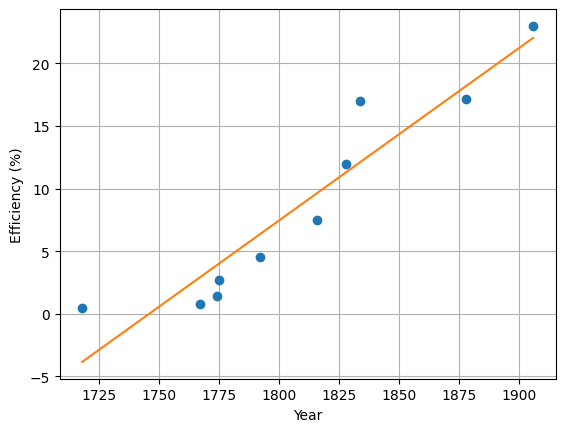

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def gaussPivot(a, b, tol=1.0e-12):
    n = len(b)
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i, :]))

    for k in range(0, n - 1):
        p = np.argmax(np.abs(a[k:n, k]) / s[k:n]) + k  # Row interchange, if needed
        if abs(a[p, k]) < tol:
            raise ValueError('Matrix is singular')

        if p != k:
            swapRows(b, k, p)
            swapRows(s, k, p)
            swapRows(a, k, p)

        for i in range(k + 1, n):
            if a[i, k] != 0.0:
                lam = a[i, k] / a[k, k]
                a[i, k + 1:n] = a[i, k + 1:n] - lam * a[k, k + 1:n]
                b[i] = b[i] - lam * b[k]

    if abs(a[n - 1, n - 1]) < tol:
        raise ValueError('Matrix is singular')

    # Back substitution
    b[n - 1] = b[n - 1] / a[n - 1, n - 1]
    for k in range(n - 2, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k + 1:n], b[k + 1:n])) / a[k, k]

    return b

def polyFit(xData, yData, m):
    a = np.zeros((m + 1, m + 1))
    b = np.zeros(m + 1)
    s = np.zeros(2 * m + 1)

    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m + 1):
            b[j] = b[j] + temp
            temp = temp * xData[i]
        temp = 1.0
        for j in range(2 * m + 1):
            s[j] = s[j] + temp
            temp = temp * xData[i]

    for i in range(m + 1):
        for j in range(m + 1):
            a[i, j] = s[i + j]

    return gaussPivot(a, b)

def stdDev(c, xData, yData):
    def evalPoly(c, x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p * x + c[m - j - 1]
        return p

    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0

    for i in range(n + 1):
        p = evalPoly(c, xData[i])
        sigma = sigma + (yData[i] - p) ** 2

    sigma = math.sqrt(sigma / (n - m))
    return sigma

def plotPoly(xData, yData, coeff, xlab='x', ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1) / 20.0
    x = np.arange(x1, x2 + dx / 10.0, dx)
    y = np.zeros(len(x))

    for i in range(m):
        y = y + coeff[i] * x ** i

    plt.plot(xData, yData, 'o', x, y, '-')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid(True)
    plt.show()

xData = np.array([1718, 1767, 1774, 1775, 1792, 1816, 1828, 1834, 1878, 1906]) * 1.0
yData = np.array([0.5, 0.8, 1.4, 2.7, 4.5, 7.5, 12.0, 17.0, 17.2, 23.0])
coeff = polyFit(xData, yData, 1)

print("Coefficients are:\n", coeff)
print("Std. deviation =", stdDev(coeff, xData, yData))
plotPoly(xData, yData, coeff, 'Year', 'Efficiency (%)')



The predicted efficiency in year 2000 is -240.39 + $0.13769\times 2000$ = 35.0%